<a href="https://colab.research.google.com/github/mborowik/zajecia/blob/main/bk_ml_klasyfikacja_12_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

# Regresja logistyczna

## Przykład 1

In [2]:
X, y= make_classification(n_samples=10000, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, n_classes=2,
                          n_clusters_per_class=1, weights=[0.5, 0.5], class_sep=0.5, random_state=123)

In [3]:
X

array([[ 0.49788532, -0.34331983],
       [ 0.22884805,  0.33910781],
       [-0.65465588, -0.57283756],
       ...,
       [-0.01654782,  0.01852002],
       [-0.72644888, -0.17969178],
       [-0.27742499,  0.51708061]])

In [4]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [5]:
df=pd.DataFrame({'feat1':X[:,0], 'feat2':X[:,1], 'target':y})

In [6]:
df.head()

,feat1,feat2,target
0,0.497885,-0.343320,0
1,0.228848,0.339108,0
2,-0.654656,-0.572838,1
3,1.008572,0.085937,0
4,-0.264578,-0.731225,1


In [7]:
df['target'].value_counts()

0    5000
1    5000
Name: target, dtype: int64

<AxesSubplot:xlabel='feat1', ylabel='feat2'>

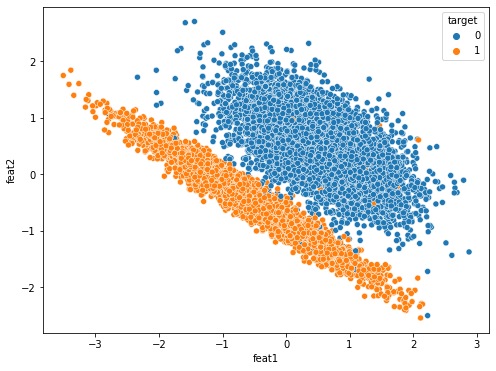

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=123)

In [12]:
print(X_train.shape)

(8000, 2)


In [13]:
print(X_test.shape)

(2000, 2)


In [14]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [17]:
y_pred2=model.predict_proba(X_test)

In [18]:
y_pred2

array([[1.90019421e-02, 9.80998058e-01],
       [9.97793358e-01, 2.20664173e-03],
       [9.99328590e-01, 6.71410143e-04],
       ...,
       [2.52908479e-02, 9.74709152e-01],
       [6.22578102e-02, 9.37742190e-01],
       [9.70124075e-01, 2.98759249e-02]])

In [19]:
df_out=pd.DataFrame({'feat1':X_test[:,0], 'feat2':X_test[:,1], 'pred':y_pred})

In [20]:
df_out.head()

,feat1,feat2,pred
0,-1.043690,-0.040488,1
1,1.240745,-0.326338,0
2,0.886928,0.104937,0
3,-0.345169,1.320803,0
4,-0.284358,0.552000,0


<AxesSubplot:xlabel='feat1', ylabel='feat2'>

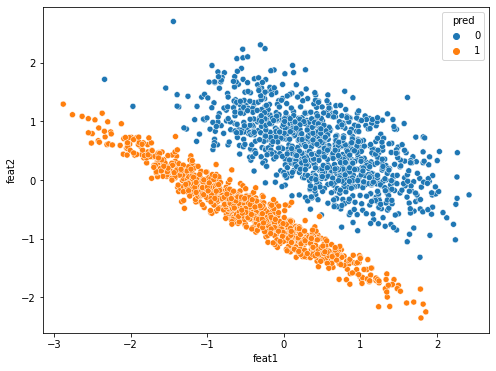

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='pred', data=df_out)

## Miary- accuracy, precision, recall, f1 score, ROC curve

In [22]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

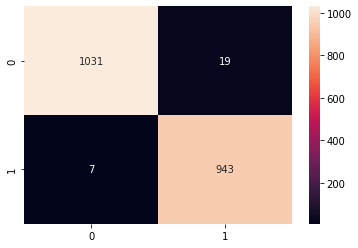

In [23]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
accuracy_score(y_test, y_pred)

0.987

In [26]:
precision_score(y_test, y_pred)

0.9802494802494802

In [27]:
recall_score(y_test, y_pred)

0.9926315789473684

In [28]:
f1_score(y_test, y_pred)

0.9864016736401673

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1050
           1       0.98      0.99      0.99       950

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## ROC

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_auc_score(y_test, y_pred)

0.9872681704260653

In [33]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


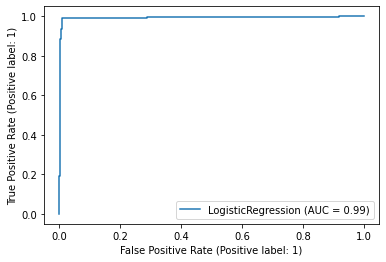

In [34]:
plot_roc_curve(model, X_test, y_test)

## Przykład 2

In [35]:
X, y= make_classification(n_samples=10000, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          weights=[0.5,0.5], class_sep=0.5, random_state=0)

In [36]:
df=pd.DataFrame({'feat1':X[:,0], 'feat2':X[:,1], 'target':y})

In [37]:
df['target'].value_counts()

1    5013
0    4987
Name: target, dtype: int64

<AxesSubplot:xlabel='feat1', ylabel='feat2'>

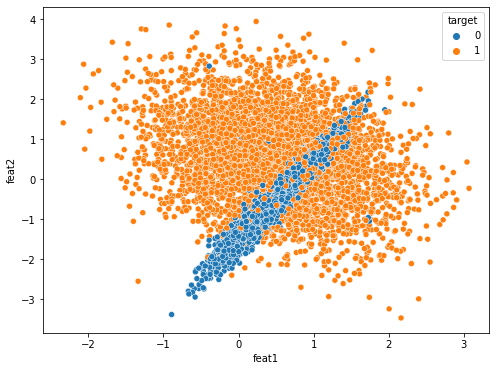

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df)

In [39]:
X_train2, X_test2, y_train2, y_test2=train_test_split(X,y, test_size=0.2)
model2=LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression()

In [40]:
y_pred2=model2.predict(X_test2)

In [41]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1037
           1       0.72      0.73      0.72       963

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [42]:
df_out=pd.DataFrame({'feat1':X_test2[:,0], 'feat2':X_test2[:,1], 'pred':y_pred2})

<AxesSubplot:xlabel='feat1', ylabel='feat2'>

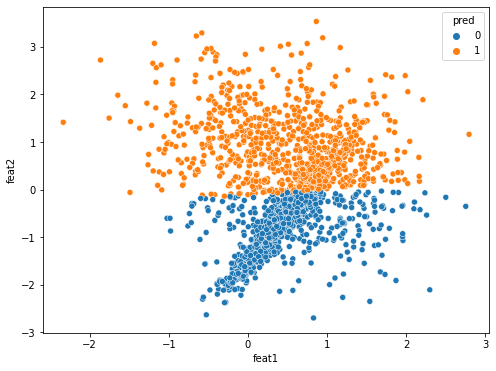

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='pred', data=df_out)

<AxesSubplot:>

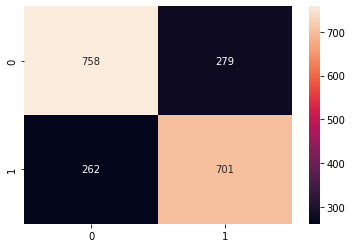

In [44]:
cm=confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True, fmt='d')

In [45]:
accuracy_score(y_test2, y_pred2)

0.7295

## Regularyzacja

In [46]:
model_l1=LogisticRegression(solver='liblinear', penalty='l1')
model_l1.fit(X_train2, y_train2)

LogisticRegression(penalty='l1', solver='liblinear')

In [47]:
y_pred_l1=model_l1.predict(X_test2)

In [48]:
print(classification_report(y_test2, y_pred_l1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1037
           1       0.72      0.73      0.72       963

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



In [49]:
model_saga=LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
model_saga.fit(X_train2, y_train2)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [50]:
y_pred_saga=model_saga.predict(X_test2)

In [51]:
print(classification_report(y_test2, y_pred_saga))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1037
           1       0.72      0.73      0.72       963

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



## Niezbalansowany zbiór danych

In [52]:
X, y= make_classification(n_samples=10000, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          weights=[0.95,0.05], class_sep=1, random_state=0)

In [53]:
df=pd.DataFrame({'feat1':X[:,0], 'feat2':X[:,1], 'target':y})

<AxesSubplot:xlabel='feat1', ylabel='feat2'>

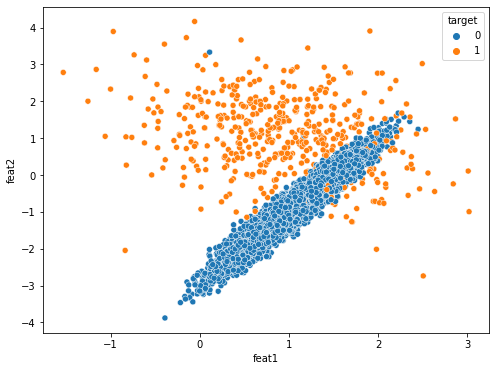

In [54]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df)

In [55]:
df['target'].value_counts()

0    9452
1     548
Name: target, dtype: int64

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=123)

In [57]:
#y_train.value_counts()

In [58]:
from collections import Counter

In [59]:
Counter(y_train)

Counter({0: 7564, 1: 436})

In [60]:
Counter(y_test)

Counter({0: 1888, 1: 112})

In [61]:
model=LogisticRegression(random_state=30)
model.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [62]:
y_pred=model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.983

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1888
           1       0.99      0.71      0.82       112

    accuracy                           0.98      2000
   macro avg       0.99      0.85      0.91      2000
weighted avg       0.98      0.98      0.98      2000



<AxesSubplot:>

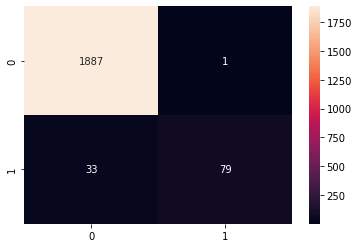

In [65]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Oversampling

In [66]:
from imblearn.over_sampling import RandomOverSampler

In [67]:
over=RandomOverSampler(random_state=42)
X_train_over, y_train_over=over.fit_resample(X_train, y_train)

In [68]:
Counter(y_train_over)

Counter({0: 7564, 1: 7564})

In [69]:
df_over=pd.DataFrame({'feat1':X_train_over[:,0], 'feat2':X_train_over[:,1], 'target':y_train_over})

Text(0.5, 1.0, 'Over sampling')

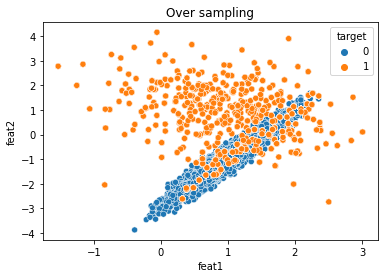

In [70]:
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df_over)
plt.title('Over sampling')

In [71]:
model=LogisticRegression(random_state=30)
model.fit(X_train_over, y_train_over)

LogisticRegression(random_state=30)

In [72]:
y_pred_over=model.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1888
           1       0.33      0.84      0.48       112

    accuracy                           0.90      2000
   macro avg       0.66      0.87      0.71      2000
weighted avg       0.95      0.90      0.92      2000



<AxesSubplot:>

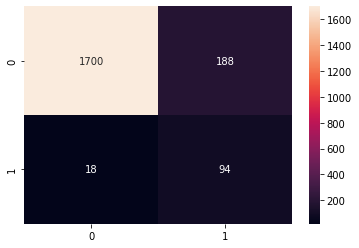

In [74]:
cm=confusion_matrix(y_test, y_pred_over)
sns.heatmap(cm, annot=True, fmt='d')

### SMOTE

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote=SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

In [77]:
Counter(y_train_smote)

Counter({0: 7564, 1: 7564})

In [78]:
df_smote=pd.DataFrame({'feat1':X_train_smote[:,0], 'feat2':X_train_smote[:,1], 'target':y_train_smote})

Text(0.5, 1.0, 'SMOTE')

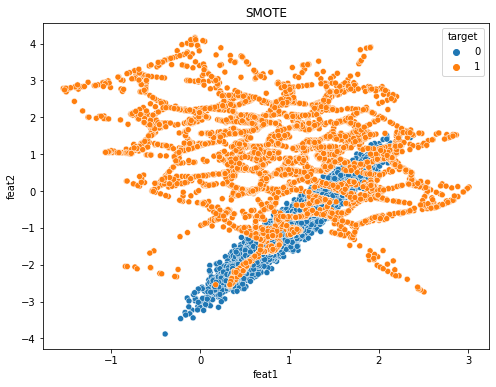

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df_smote)
plt.title('SMOTE')

In [80]:
model=LogisticRegression(random_state=30)
model.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=30)

In [81]:
y_pred_smote=model.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1888
           1       0.34      0.84      0.48       112

    accuracy                           0.90      2000
   macro avg       0.66      0.87      0.71      2000
weighted avg       0.95      0.90      0.92      2000



### Under sampling

In [83]:
from imblearn.under_sampling import RandomUnderSampler

In [84]:
under=RandomUnderSampler(random_state=30)
X_train_under, y_train_under=under.fit_resample(X_train, y_train)

In [85]:
Counter(y_train_under)

Counter({0: 436, 1: 436})

In [86]:
df_under=pd.DataFrame({'feat1':X_train_under[:,0], 'feat2':X_train_under[:,1], 'target':y_train_under})

Text(0.5, 1.0, 'Under sampling')

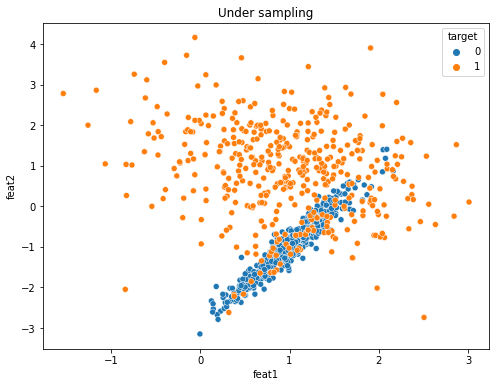

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df_under)
plt.title('Under sampling')

In [88]:
model=LogisticRegression(random_state=30)
model.fit(X_train_under, y_train_under)

LogisticRegression(random_state=30)

In [89]:
y_pred_under=model.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1888
           1       0.34      0.84      0.48       112

    accuracy                           0.90      2000
   macro avg       0.66      0.87      0.71      2000
weighted avg       0.95      0.90      0.92      2000



### class_weight

In [91]:
model_weight=LogisticRegression(class_weight='balanced')
model_weight.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [92]:
y_pred_weight=model_weight.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred_weight))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1888
           1       0.34      0.84      0.48       112

    accuracy                           0.90      2000
   macro avg       0.66      0.87      0.71      2000
weighted avg       0.95      0.90      0.92      2000



## Zadanie 1

In [94]:
! git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Updating files: 100% (127/127), done.


In [95]:
diabetes=pd.read_csv('ML-datasets/diabetes.csv')

In [96]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [97]:
diabetes['Class']=diabetes['Class'].astype('category').cat.codes

In [98]:
diabetes.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [99]:
y=diabetes.pop('Class')

In [100]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int8

In [101]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [102]:
X=diabetes

In [103]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [104]:
y.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [105]:
X_train, X_test, y_train, y_test= train_test_split(X,y, stratify=y)

In [106]:
y_train.value_counts()

0    375
1    201
Name: Class, dtype: int64

In [107]:
y_test.value_counts()

0    125
1     67
Name: Class, dtype: int64

In [108]:
model=LogisticRegression(random_state=30)
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=30)

In [109]:
y_pred=model.predict(X_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       125
           1       0.76      0.51      0.61        67

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.77      0.76       192



In [111]:
model=LogisticRegression(random_state=30, class_weight='balanced')
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=30)

In [112]:
y_pred=model.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       125
           1       0.58      0.67      0.62        67

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.72       192



In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
model=LogisticRegression(class_weight='balanced', random_state=123)

In [116]:
scores=cross_val_score(model, X,y,scoring='accuracy', cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [117]:
scores

array([0.74025974, 0.70779221, 0.74675325, 0.83006536, 0.75816993])

In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc=StandardScaler()

In [120]:
X_train_sc=sc.fit_transform(X_train)

In [121]:
X_test_sc=sc.fit_transform(X_test)

In [122]:
X_train_sc

array([[-0.85171705, -1.25813798, -0.74522474, ..., -1.60942136,
        -0.65122246, -1.03845995],
       [ 0.67090561, -0.55986349, -0.16707561, ..., -0.94535297,
        -0.67800222, -0.35319238],
       [ 0.36638108,  1.3528014 ,  0.35851451, ...,  1.78754387,
        -0.40722906, -0.52450927],
       ...,
       [-0.24266799,  1.47424044, -0.27219363, ...,  0.35724272,
        -0.3596206 , -0.26753393],
       [-0.85171705, -0.28662565,  0.14827846, ...,  0.34447217,
         0.15217042, -0.69582617],
       [-0.54719252, -0.95454038,  0.04316044, ..., -0.56223659,
        -1.165989  , -0.95280151]])

In [123]:
X_sc=sc.fit_transform(X)

In [124]:
X_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [125]:
model=LogisticRegression(class_weight='balanced', random_state=123)

In [126]:
scores=cross_val_score(model, X_sc, y, cv=5, scoring='accuracy')

In [127]:
scores

array([0.75974026, 0.70779221, 0.73376623, 0.83006536, 0.74509804])

## Multiclass

In [128]:
X, y= make_classification(n_samples=10000, n_features=2,
                          n_informative=2, n_redundant=0,
                          n_repeated=0, n_classes=3,
                          n_clusters_per_class=1, weights=[0.3,0.4, 0.3], class_sep=1, random_state=0)

In [129]:
Counter(y)

Counter({0: 2991, 1: 3997, 2: 3012})

In [130]:
df=pd.DataFrame({'feat1':X[:,0], 'feat2':X[:,1], 'target':y})

<AxesSubplot:xlabel='feat1', ylabel='feat2'>

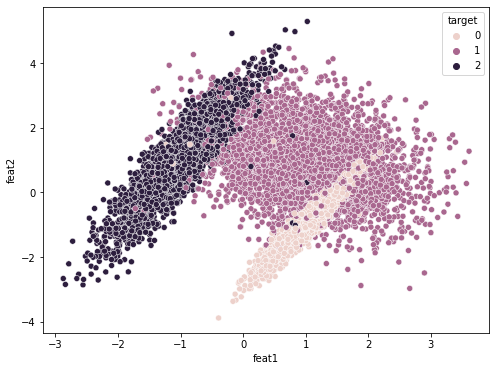

In [131]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1', y='feat2', hue='target', data=df)

In [132]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=123)

In [133]:
model_multi=LogisticRegression(multi_class='ovr', solver='liblinear')
model_multi.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [134]:
y_pred=model_multi.predict(X_test)

In [135]:
y_pred

array([1, 0, 2, ..., 2, 1, 0])

In [136]:
y_pred2=model_multi.predict_proba(X_test)

In [137]:
y_pred2

array([[7.20865243e-02, 9.27032891e-01, 8.80584228e-04],
       [9.02567813e-01, 9.61458762e-02, 1.28631068e-03],
       [4.12825106e-03, 5.48484641e-02, 9.41023285e-01],
       ...,
       [2.46369635e-03, 1.17122165e-01, 8.80414139e-01],
       [1.46416244e-02, 9.85099565e-01, 2.58810311e-04],
       [8.03223957e-01, 1.96428397e-01, 3.47645418e-04]])

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       588
           1       0.83      0.86      0.84       797
           2       0.92      0.93      0.92       615

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [139]:
confusion_matrix(y_test, y_pred)

array([[482, 103,   3],
       [ 67, 682,  48],
       [  3,  41, 571]])

## Zadanie 2

In [140]:
iris=pd.read_csv('ML-datasets/iris.csv')

In [141]:
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>

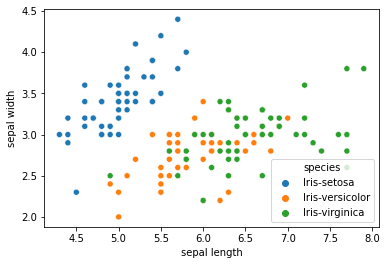

In [142]:
sns.scatterplot(x='sepal length', y='sepal width', hue='species', data=iris)

In [143]:
iris['species']=iris['species'].astype('category').cat.codes

In [144]:
y=iris.pop('species')

In [145]:
Counter(y)

Counter({0: 50, 1: 50, 2: 50})

In [146]:
X=iris

In [147]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [148]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [149]:
model_multi=LogisticRegression(multi_class='ovr', solver='liblinear')
model_multi.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [150]:
y_pred=model_multi.predict(X_test)

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [152]:
y_pred_proba=model_multi.predict_proba(X_test)

In [153]:
y_pred_proba

array([[8.04061480e-04, 2.18101484e-01, 7.81094454e-01],
       [9.26560452e-05, 3.88891989e-01, 6.11015355e-01],
       [4.21343418e-02, 7.68371095e-01, 1.89494563e-01],
       [6.03516394e-04, 2.44477610e-01, 7.54918874e-01],
       [8.04144155e-01, 1.95656827e-01, 1.99018538e-04],
       [1.25555296e-03, 3.94180574e-01, 6.04563873e-01],
       [3.83181172e-04, 3.04866633e-01, 6.94750186e-01],
       [9.00920516e-01, 9.90478761e-02, 3.16076879e-05],
       [8.13380805e-01, 1.86532417e-01, 8.67778707e-05],
       [9.11302389e-04, 2.75355086e-01, 7.23733611e-01],
       [3.47932779e-02, 7.37274558e-01, 2.27932165e-01],
       [4.38333960e-02, 6.16345476e-01, 3.39821128e-01],
       [1.41123475e-02, 7.24732706e-01, 2.61154946e-01],
       [8.65478032e-01, 1.34489854e-01, 3.21133210e-05],
       [1.42393957e-01, 8.01474171e-01, 5.61318715e-02],
       [8.34582741e-01, 1.65335313e-01, 8.19460711e-05],
       [4.07508705e-03, 4.08067636e-01, 5.87857277e-01],
       [8.84817610e-01, 1.15086